In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.load('increments.npz').files

['ensX',
 'X_inc',
 't_obs',
 'l_obs',
 't_inc',
 'X_truth',
 'Y_truth',
 't_truth',
 'X_obs']

In [3]:
t_truth = np.load('increments.npz')['t_truth']
X_truth = np.load('increments.npz')['X_truth']
dt = np.diff( t_truth )[0]
t_inc = np.load('increments.npz')['t_inc']
dt_inc = np.diff( t_inc )[0]
da_interval = int( dt_inc/dt )
ensX = np.load('increments.npz')['ensX']
X_inc = np.load('increments.npz')['X_inc']
X_obs = np.load('increments.npz')['X_obs']
l_obs = np.load('increments.npz')['l_obs']

meanX = ensX.mean(axis=-1)
meanXinc = X_inc.mean(axis=-1)

In [4]:
whos

Variable      Type       Data/Info
----------------------------------
X_inc         ndarray    400x8x50: 160000 elems, type `float64`, 1280000 bytes (1.220703125 Mb)
X_obs         ndarray    400x8: 3200 elems, type `float64`, 25600 bytes
X_truth       ndarray    4001x8: 32008 elems, type `float64`, 256064 bytes (250.0625 kb)
da_interval   int        10
dt            float64    0.005
dt_inc        float64    0.05
ensX          ndarray    4001x8x50: 1600400 elems, type `float64`, 12803200 bytes (12.2100830078125 Mb)
l_obs         ndarray    400x8: 3200 elems, type `int32`, 12800 bytes
meanX         ndarray    4001x8: 32008 elems, type `float64`, 256064 bytes (250.0625 kb)
meanXinc      ndarray    400x8: 3200 elems, type `float64`, 25600 bytes
np            module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt           module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
t_inc         ndarray    400: 400 elems, type `float64`, 3200 bytes
t_truth       ndarr

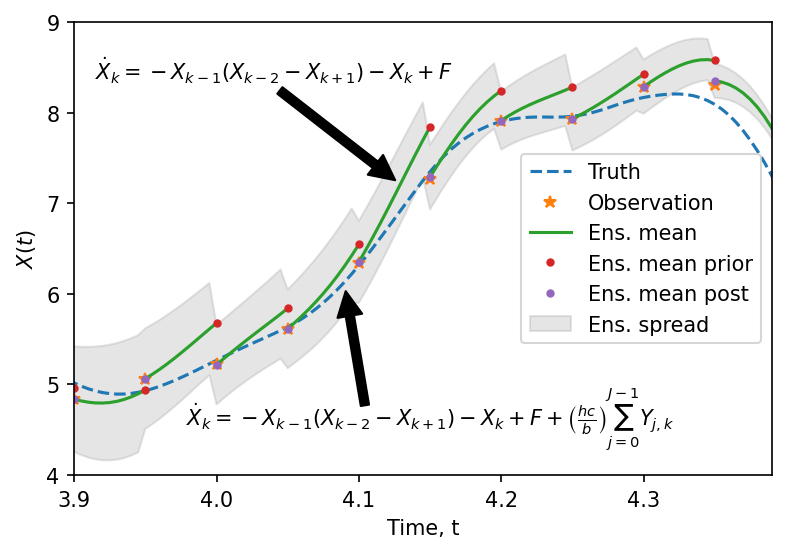

In [5]:
k = 0
nti,K = meanXinc.shape

tt = t_truth[:-1].reshape((t_inc.size,da_interval))
xx = meanX[:-1].reshape((t_inc.size,da_interval,K))
tt = np.column_stack((tt, t_inc))
xx = np.append(xx, (meanX[da_interval::da_interval,:]-meanXinc).reshape((nti,1,K)) ,axis=1)
tt = np.column_stack((tt, t_inc)).flatten()
xx = np.append(xx, np.nan*meanX[da_interval::da_interval,:].reshape((nti,1,K)) ,axis=1)

plt.figure(dpi=150)
# plt.suptitle('Ensemble mean, k = %i'%(k));
plt.plot(t_truth, X_truth[:,k], '--', label='Truth' );
plt.fill_between(t_truth,
                 meanX[:,k]-ensX[:,k,:].std(axis=-1),
                 meanX[:,k]+ensX[:,k,:].std(axis=-1), color='grey', alpha=0.2, label='Ens. spread' );
plt.plot(t_inc, np.take_along_axis(X_obs, np.argsort(l_obs,axis=1), axis=1)[:,k], '*', label='Observation')
plt.plot(tt.flatten(), xx[:,:,k].flatten(), '-', label='Ens. mean' );
plt.plot(t_inc, meanX[da_interval::da_interval,k]-meanXinc[:,k], '.', label='Ens. mean prior' );
plt.plot(t_inc, meanX[da_interval::da_interval,k], '.', label='Ens. mean post')
plt.xlabel('Time, t'); plt.ylabel('$X(t)$'); plt.legend(loc='center right');
plt.xlim(3.9,4.39); plt.ylim(4,9);
plt.text(4.04, 8.3, r'$\dot{X}_k=- X_{k-1} \left( X_{k-2} - X_{k+1} \right) - X_k + F$', ha='center', va='bottom');
plt.gca().annotate('', xytext=(4.04, 8.3), ha='center', va='bottom',
                   xy=(4.13, 7.2), arrowprops=dict(facecolor='black', shrink=0.05) );
plt.text(4.15, 5.0,
         r'$\dot{X}_k=- X_{k-1} \left( X_{k-2} - X_{k+1} \right) - X_k + F + \left( \frac{hc}{b} \right) \sum_{j=0}^{J-1} Y_{j,k}$',
         ha='center', va='top');
plt.gca().annotate('', xytext=(4.105, 4.7), ha='center', va='bottom',
                   xy=(4.09, 6.1), arrowprops=dict(facecolor='black', shrink=0.05) );